<a href="https://colab.research.google.com/github/Paul-mwaura/CrowdsourcingML/blob/main/CrowdsourcingML_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CrowdsourcingML on Amazon Data

In [1]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 3.4MB/s 


## Import Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Algorithms
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

# Metric Libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics

 
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [3]:
df = pd.read_csv("amazon.csv")
df.head()

,A1LZWU72K42V92,23,0,1,298
0,ASS4LIVDW452F,23,1,1,6
1,A2QAIIROYI52KO,23,1,1,96
2,A3PRX6CU0P34NE,23,1,1,175
3,A9KPCMO1J1LQF,23,1,1,7
4,A3PM8L29POUPBQ,23,1,1,19


**Rename the Columns**

In [4]:
df.columns = ['worker_id', 'task_id', 'worker_reviews', 'expert_reviews', 'time_taken']
df.head(2)

,worker_id,task_id,worker_reviews,expert_reviews,time_taken
0,ASS4LIVDW452F,23,1,1,6
1,A2QAIIROYI52KO,23,1,1,96


**Check Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   worker_id       9999 non-null   object
 1   task_id         9999 non-null   int64 
 2   worker_reviews  9999 non-null   int64 
 3   expert_reviews  9999 non-null   int64 
 4   time_taken      9999 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 390.7+ KB


**Get a Description of float and integer variables**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
task_id,9999.0,5231.690869,3038.048031,23.0,2678.0,5145.0,7788.5,10431.0
worker_reviews,9999.0,0.501150,0.500024,0.0,0.0,1.0,1.0,1.0
expert_reviews,9999.0,0.509951,0.499926,0.0,0.0,1.0,1.0,1.0
time_taken,9999.0,49.832983,149.816403,1.0,6.0,9.0,21.0,3265.0


**Check the size of the dataset**

In [7]:
df.shape

(9999, 5)

**Print dataset column names**

In [8]:
columns = df.columns
columns

Index(['worker_id', 'task_id', 'worker_reviews', 'expert_reviews',
       'time_taken'],
      dtype='object')

**Get the count of unique values in the columns**

In [9]:
for col in columns:
  print(f'Length of Unique values in {col} is: {len(df[col].unique())}')

Length of Unique values in worker_id is: 143
Length of Unique values in task_id is: 500
Length of Unique values in worker_reviews is: 2
Length of Unique values in expert_reviews is: 2
Length of Unique values in time_taken is: 527


## Data Cleaning

**Check for null values**

In [10]:
df.isna().sum()

worker_id         0
task_id           0
worker_reviews    0
expert_reviews    0
time_taken        0
dtype: int64

**Check for Duplicated Values**

In [11]:
df.duplicated().sum()

0

**Get dummy values for the worker_id column**

In [12]:
df['worker_id'] = pd.get_dummies(df['worker_id'])
df.head(2)

,worker_id,task_id,worker_reviews,expert_reviews,time_taken
0,0,23,1,1,6
1,0,23,1,1,96


## Exploratory Data Analysis

### Scatter Plots

#### Worker Reviews

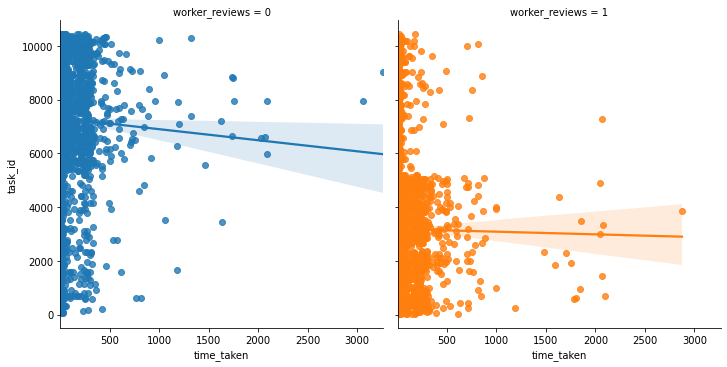

In [13]:
sns.lmplot(data=df, x="time_taken", y="task_id", col="worker_reviews", hue="worker_reviews")

#### Expert Reviews

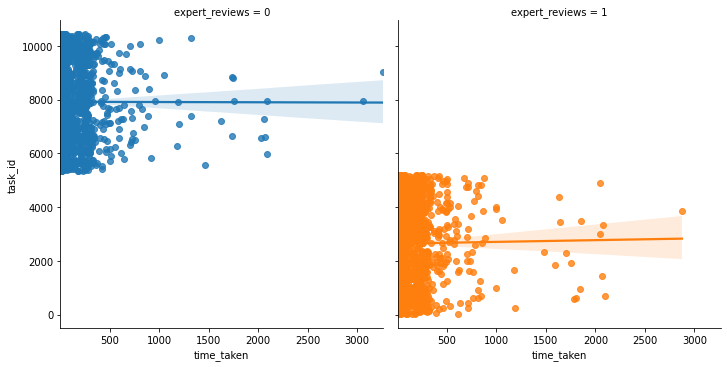

In [14]:
sns.lmplot(data=df, x="time_taken", y="task_id", col="expert_reviews", hue="expert_reviews")

###  Joint Plots

#### Worker Reviews

Text(0.5, 1.0, 'Time Taken and Task ID Joint Plot for Worker Reviews')

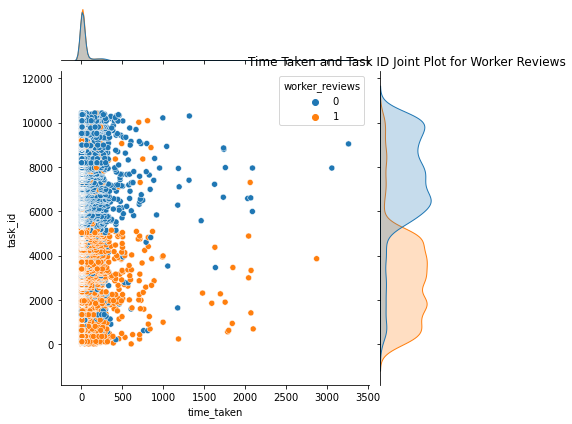

In [15]:
sns.jointplot(data=df, x="time_taken", y="task_id", hue="worker_reviews")
plt.title('Time Taken and Task ID Joint Plot for Worker Reviews')

#### Expert Reviews

Text(0.5, 1.0, 'Time Taken and Task ID Joint Plot for Expert Reviews')

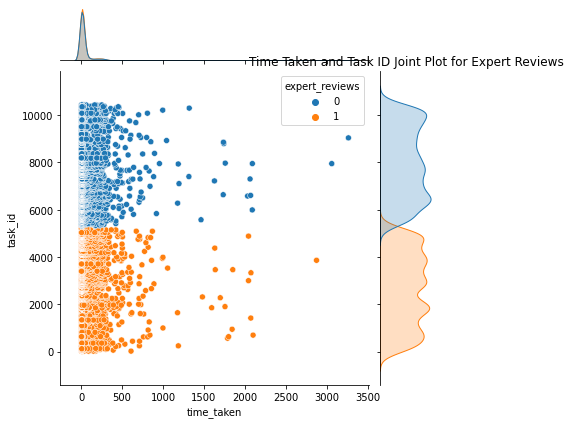

In [16]:
sns.jointplot(data=df, x="time_taken", y="task_id", hue="expert_reviews")
plt.title('Time Taken and Task ID Joint Plot for Expert Reviews')

## Implementing the solution

**Split data into x(features) and y(labels)**

In [17]:
x = df[['task_id', 'time_taken']]
y = df[['worker_reviews', 'expert_reviews']]
y.head(2)

,worker_reviews,expert_reviews
0,1,1
1,1,1


**Split data into train(80%)and test(20%)**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

### Classifier Chains


<a href='https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain'>Classifier chains</a> is a machine learning method for problem transformation in multi-label classification. It combines the computational efficiency of the Binary Relevance method while still being able to take the label dependencies into account for classification.
>>
Each model makes a prediction in the order specified by the chain using all of the available features provided to the model plus the predictions of models that are earlier in the chain.
>>
When predicting, the true labels will not be available. Instead the predictions of each model are passed on to the subsequent models in the chain to be used as features.
>>
Clearly the order of the chain is important. The first model in the chain has no information about the other labels while the last model in the chain has features indicating the presence of all of the other labels. In general one does not know the optimal ordering of the models in the chain so typically many randomly ordered chains are fit and their predictions are averaged together.

#### GaussianNB Classifier

In [19]:
# using classifier chains

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
gaussian = GaussianNB()
gaussian_clf = ClassifierChain(gaussian)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# train
gaussian_clf.fit(X_train, y_train)

# predict
gaussian_preds = gaussian_clf.predict(X_test)

print(f'Gaussian accuracy score: {accuracy_score(y_test,gaussian_preds)*100}%')

Gaussian accuracy score: 88.75%


In [20]:
gaussian_preds = pd.DataFrame.sparse.from_spmatrix(gaussian_preds)
gaussian_preds.columns=['worker', 'expert']

gaussian_preds.head()

,worker,expert
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


In [21]:
gaussian_pred_w = gaussian_preds['worker']
y_test_gw = y_test['worker_reviews']
gaussian_pred_e = gaussian_preds['expert']
y_test_ge = y_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_test_gw, gaussian_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_test_gw, gaussian_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_test_ge, gaussian_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_test_ge, gaussian_pred_e)*100}")

Worker Precision:, 88.31168831168831
Worker Recall:, 89.20282542885974

Expert Precision:, 100.0
Expert Recall:, 99.50347567030785


**Confusion Matrix for Workers**

Predicted    0  1.0
Actual             
0           79   77
1          111  109


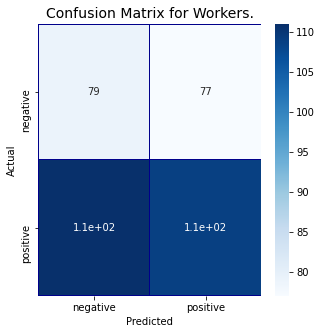

In [22]:
cm = pd.crosstab(y_test_gw, gaussian_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Workers.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

**Confusion Matrix for Experts**

Predicted    0  1.0
Actual             
0           78   73
1          112  113


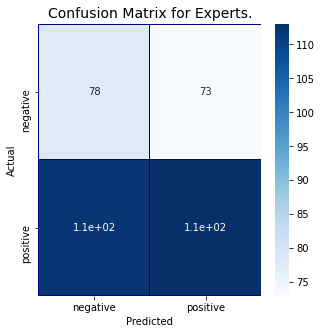

In [23]:
cm = pd.crosstab(y_test_ge, gaussian_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

#### Logistic Regression

In [24]:
#Logistic Regression

log_reg = LogisticRegression()
lr_clf = ClassifierChain(log_reg)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train
lr_clf.fit(X_train, y_train)

# predict
log_reg_preds = lr_clf.predict(X_test)

from sklearn import metrics

print(f'Accuracy: {accuracy_score(y_test,log_reg_preds)*100}%')

Accuracy: 88.94999999999999%


In [25]:
log_reg_preds = pd.DataFrame.sparse.from_spmatrix(log_reg_preds)
log_reg_preds.columns=['worker_reviews', 'expert_reviews']
log_reg_preds.head(2)

,worker_reviews,expert_reviews
0,1.0,1.0
1,0.0,0.0


In [26]:
log_reg_pred_w = log_reg_preds['worker_reviews']
y_test_lw = y_test['worker_reviews']
log_reg_pred_e = log_reg_preds['expert_reviews']
y_test_le = y_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_test_lw, log_reg_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_test_lw, log_reg_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_test_le, log_reg_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_test_le, log_reg_pred_e)*100}")

Worker Precision:, 88.27037773359841
Worker Recall:, 89.60645812310797

Expert Precision:, 100.0
Expert Recall:, 100.0


**Confusion Matrix for Workers**

Predicted    0  1.0
Actual             
0           79   77
1          111  109


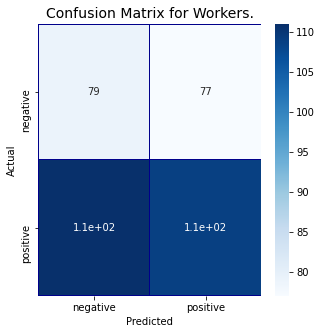

In [27]:
cm = pd.crosstab(y_test_lw, log_reg_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Workers.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

**Confusion Matrix for Experts**

Predicted    0  1.0
Actual             
0           78   73
1          112  113


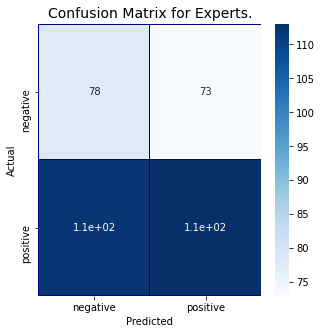

In [28]:
cm = pd.crosstab(y_test_le, log_reg_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

#### KMeans Classifier

In [89]:
#KMeans

k_means = KMeans(n_clusters=2)
kmeans_clf = ClassifierChain(k_means)

# train
kmeans_clf.fit(X_train, y_train)

# predict
kmeans_preds = kmeans_clf.predict(X_test)

print(f'KMeans accuracy score: {accuracy_score(y_test,kmeans_preds)*100}%')

KMeans accuracy score: 0.0%


In [90]:
kmeans_preds = pd.DataFrame.sparse.from_spmatrix(kmeans_preds)
kmeans_preds.columns=['worker_reviews', 'expert_reviews']
kmeans_preds.head(3)

,worker_reviews,expert_reviews
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0


In [31]:
kmeans_pred_w = kmeans_preds['worker_reviews']
y_test_kmw = y_test['worker_reviews']
kmeans_pred_e = kmeans_preds['expert_reviews']
y_test_kme = y_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_test_kmw, kmeans_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_test_kmw, kmeans_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_test_kme, kmeans_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_test_kme, kmeans_pred_e)*100}")

Worker Precision:, 88.28202581926514
Worker Recall:, 89.70736629667003

Expert Precision:, 100.0
Expert Recall:, 100.0


Predicted    0  1.0
Actual             
0           79   77
1          111  109


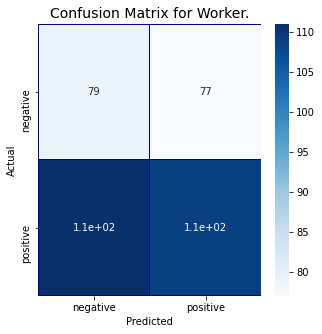

In [32]:
cm = pd.crosstab(y_test_kmw, kmeans_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Worker.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

Predicted    0  1.0
Actual             
0           78   73
1          112  113


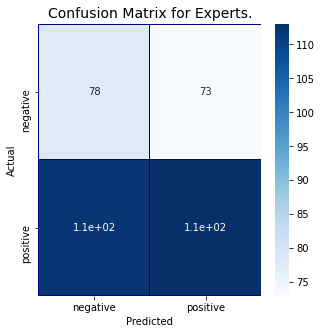

In [33]:
cm = pd.crosstab(y_test_kme, kmeans_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

#### BernouliNB Classifier

In [34]:
#Naive Bayes(Bernouli)

bernNB = BernoulliNB(binarize = 0.1)
bernNB_clf = ClassifierChain(bernNB)

# train
bernNB_clf.fit(X_train, y_train)

# predict
bernNB_preds = bernNB_clf.predict(X_test)

print(f'Bernouli accuracy score: {accuracy_score(y_test,bernNB_preds)*100}%')

Bernouli accuracy score: 87.25%


In [35]:
bernNB_preds = pd.DataFrame.sparse.from_spmatrix(bernNB_preds)
bernNB_preds.columns=['worker_reviews', 'expert_reviews']
bernNB_preds.head(3)

,worker_reviews,expert_reviews
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0


#### 5-fold cross validation

In [36]:
print('5-fold cross validation: \n')

labels = ['Gaussian', 'Logistic Regression', 'K Means', 'Naive Bayes']


for clf, label in zip([gaussian_clf, lr_clf, kmeans_clf, bernNB_clf], labels):
  scores = model_selection.cross_val_score(clf, x, y, cv=5, scoring='accuracy')
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean()*100, scores.std(), label))

value_hard = 0.82

5-fold cross validation: 

Accuracy: 88.69 (+/- 0.01) [Gaussian]
Accuracy: 88.86 (+/- 0.01) [Logistic Regression]
Accuracy: 2.49 (+/- 0.04) [K Means]
Accuracy: 24.55 (+/- 0.14) [Naive Bayes]


Now we can proceed to identify bias using our algorithms.

## Bias detection and mitigation

### Install aif360

In [37]:
pip install aif360[all]

     |████████████████████████████████| 184kB 5.0MB/s 
     |████████████████████████████████| 2.6MB 4.8MB/s 
     |████████████████████████████████| 276kB 15.6MB/s 
     |████████████████████████████████| 9.2MB 12.3MB/s 
     |████████████████████████████████| 972kB 43.4MB/s 
     |████████████████████████████████| 21.2MB 50.1MB/s 
     |████████████████████████████████| 358kB 56.6MB/s 
     |████████████████████████████████| 552kB 47.7MB/s 
     |████████████████████████████████| 235kB 45.2MB/s 
     |████████████████████████████████| 21.6MB 1.4MB/s 
     |████████████████████████████████| 3.4MB 19.1MB/s 
     |████████████████████████████████| 747kB 40.1MB/s 
     |████████████████████████████████| 25.3MB 1.5MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394769 sha256=c1292f84b3d3bdda32316711db1b7686c3f8bdc8fb200693881b03522efdfe55
  Stored in directory: /root/.cache/pip/wheels/66/82/7b/ac2a79b8caf97e15ed415162a7f272cbba1e2e2c

### Identifying Bias in the Data

In [50]:
positive_df = df[df['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = df[df['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}')

Num privileged: 5011
Num unprivileged: 4988


In [51]:
unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

Unprivileged ratio: 0.11547714514835605


In [53]:
privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}')

Privileged ratio: 0.9026142486529635


In [56]:
# Calculating disparate impact
disparate_impact = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact}')

Disparate Impact: 0.12793631977413492


The industry standard is a four-fifths rule: if the unprivileged group receives a positive outcome less than 80% of their proportion of the privilege group, this is a disparate impact violation. However, you may decide to increase this for your business.

In this scenario, we are below the threshold of 0.98 so we deem this to be fair.

A disparate income ratio of 1 indicates complete equality.

### Mitigating Bias with AI Fairness 360

In [43]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df,
    label_names=['expert_reviews'],
    protected_attribute_names=['worker_reviews'])

In [57]:
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]
transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
worker_id,9999.0,0.008401,0.091275,0.0,0.0,0.0,0.0,1.0
task_id,9999.0,4459.792579,2746.186450,23.0,2346.0,4034.0,6334.0,10431.0
worker_reviews,9999.0,0.501150,0.500024,0.0,0.0,1.0,1.0,1.0
time_taken,9999.0,48.701070,144.287692,1.0,5.0,8.0,21.0,2875.0
expert_reviews,9999.0,0.509951,0.499926,0.0,0.0,1.0,1.0,1.0


In [69]:
x_trans = transformed[['task_id', 'time_taken']]
y = transformed[['worker_reviews', 'expert_reviews']]
scaler = StandardScaler()
x_trans = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y, test_size=0.2, random_state = 0)

### Models

#### GaussianNB Classifier

In [83]:
gaussian_clf.fit(x_trans_train, y_trans_train)

y_trans_preds_g = gaussian_clf.predict(x_trans_test)


print(f'Gaussian accuracy score: {accuracy_score(y_trans_test, y_trans_preds_g)*100}%\n')

# Convert predictions from sparse matrix to dataframe.
y_trans_preds_g = pd.DataFrame.sparse.from_spmatrix(y_trans_preds_g)
y_trans_preds_g.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
gaussian_trans_pred_w = y_trans_preds_g['worker_reviews']
y_trans_test_gw = y_trans_test['worker_reviews']
gaussian_trans_pred_e = y_trans_preds_g['expert_reviews']
y_trans_test_ge = y_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_trans_test_gw, gaussian_trans_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_trans_test_gw, gaussian_trans_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_trans_test_gw, gaussian_trans_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_trans_test_gw, gaussian_trans_pred_e)*100}")

Gaussian accuracy score: 69.0%

Worker Precision:, 65.70048309178745
Worker Recall:, 80.79207920792079

Expert Precision:, 65.67284448025785
Expert Recall:, 80.6930693069307


#### Logistic Regression

In [85]:
lr_clf.fit(x_trans_train, y_trans_train)

y_trans_preds_lr = lr_clf.predict(x_trans_test)

print(f'Logistic accuracy score: {accuracy_score(y_trans_test, y_trans_preds_lr)*100}%\n')

# Convert predictions from sparse matrix to dataframe.
y_trans_preds_lr = pd.DataFrame.sparse.from_spmatrix(y_trans_preds_lr)
y_trans_preds_lr.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
lr_trans_pred_w = y_trans_preds_lr['worker_reviews']
y_trans_test_lw = y_trans_test['worker_reviews']
lr_trans_pred_e = y_trans_preds_lr['expert_reviews']
y_trans_test_le = y_trans_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_trans_test_lw, lr_trans_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_trans_test_lw, lr_trans_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_trans_test_lw, lr_trans_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_trans_test_lw, lr_trans_pred_e)*100}")

Logistic accuracy score: 69.85%

Worker Precision:, 67.80402449693788
Worker Recall:, 76.73267326732673

Expert Precision:, 67.80402449693788
Expert Recall:, 76.73267326732673


#### KMeans Classifier

In [86]:
# train
kmeans_clf.fit(x_trans_train, y_trans_train)

# predict
kmeans_trans_preds = kmeans_clf.predict(x_trans_test)

print(f'KMeans accuracy score: {accuracy_score(y_trans_test,kmeans_trans_preds)*100}%\n')

# Convert predictions from sparse matrix to dataframe.
kmeans_trans_preds = pd.DataFrame.sparse.from_spmatrix(kmeans_trans_preds)
kmeans_trans_preds.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
kmeans_trans_pred_w = kmeans_trans_preds['worker_reviews']
y_trans_test_kw = y_trans_test['worker_reviews']
kmeans_trans_pred_e = kmeans_trans_preds['expert_reviews']
y_trans_test_ke = y_trans_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_trans_test_kw, kmeans_trans_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_trans_test_kw, kmeans_trans_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_trans_test_kw, kmeans_trans_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_trans_test_kw, kmeans_trans_pred_e)*100}")

KMeans accuracy score: 10.65%

Worker Precision:, 16.45101663585952
Worker Recall:, 8.81188118811881

Expert Precision:, 62.63661202185792
Expert Recall:, 90.79207920792079


#### Naive Bayes Classifier

In [91]:
# train
bernNB_clf.fit(x_trans_train, y_trans_train)

# predict
bernNB_trans_preds = bernNB_clf.predict(x_trans_test)

print(f'BernouliNB accuracy score: {accuracy_score(y_trans_test,bernNB_trans_preds)*100}%\n')

# Convert predictions from sparse matrix to dataframe.
bernNB_trans_preds = pd.DataFrame.sparse.from_spmatrix(bernNB_trans_preds)
bernNB_trans_preds.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
bernNB_trans_pred_w = bernNB_trans_preds['worker_reviews']
y_trans_test_bern_w = y_trans_test['worker_reviews']
bernNB_trans_pred_e = bernNB_trans_preds['expert_reviews']
y_trans_test_bern_e = y_trans_test['expert_reviews']

print(f"Worker Precision:, {metrics.precision_score(y_trans_test_bern_w, bernNB_trans_pred_w)*100}")
print(f"Worker Recall:, {metrics.recall_score(y_trans_test_bern_w, bernNB_trans_pred_w)*100}\n")
print(f"Expert Precision:, {metrics.precision_score(y_trans_test_bern_w, bernNB_trans_pred_e)*100}")
print(f"Expert Recall:, {metrics.recall_score(y_trans_test_bern_w, bernNB_trans_pred_e)*100}")

BernouliNB accuracy score: 69.65%

Worker Precision:, 65.85365853658537
Worker Recall:, 82.87128712871286

Expert Precision:, 65.85365853658537
Expert Recall:, 82.87128712871286
